# EMT Results Processing
### Author: Joel Meoak
### This notebook is used to process the results of testing with the EMT framework 

In [1]:
import pandas as pd
import numpy as np
from fractions import Fraction
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', 100)

In [3]:
csv_name1 = 'UNC2589_results_final_final.csv'
csv_path = 'K:\\development\\VMshare\\' + csv_name1
csv_path

'K:\\development\\VMshare\\UNC2589_results_final_final.csv'

In [4]:
report = pd.read_csv(csv_path)

In [5]:
report = report.drop(columns=report.columns[0])
report

,Attack/Group,Model,SHA256 Hash,File Name,Detected,FileType,VT Score
0,BleedingBear_UACert,GBC1.joblib,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70
1,BleedingBear_UACert,GBC1.joblib,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,1,exe,52/72
2,BleedingBear_UACert,TR1.joblib,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70
3,BleedingBear_UACert,TR1.joblib,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,1,exe,52/72
4,BleedingBear_UACert,RF9_DLLW.joblib,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70
...,...,...,...,...,...,...,...
987,Whispergate_Picusecurity,lgbm.joblib,ff3b45ecfbbdb780b48b4c829d2b6078d8f7673d823bedbd6321699770fa3f84,ff3b45ecfbbdb780b48b4c829d2b6078d8f7673d823bedbd6321699770fa3f84,0,exe,52/72
988,Whispergate_Picusecurity,lgbm.joblib,9cdaacaba35c3a473ec5b652d035a9593ee822609e79662223869e2b7298dc0a,9cdaacaba35c3a473ec5b652d035a9593ee822609e79662223869e2b7298dc0a,0,exe,52/71
989,Whispergate_Picusecurity,lgbm.joblib,35ab54a9502e975c996cbaee3d6a690da753b4af28808d3be2054f8a58e5c7c5,35ab54a9502e975c996cbaee3d6a690da753b4af28808d3be2054f8a58e5c7c5,0,exe,51/70
990,Whispergate_Picusecurity,lgbm.joblib,00bc665d96ecadc6beb2a9384773a70391f08f8e7a2876253f32ceec793eb728,00bc665d96ecadc6beb2a9384773a70391f08f8e7a2876253f32ceec793eb728,0,exe,51/70


In [6]:
report['Model'] = report['Model'].replace('GBC1.joblib', 'Gradient Boost')
report['Model'] = report['Model'].replace('TR1.joblib', 'Decision Tree')
report['Model'] = report['Model'].replace('RF9_DLLW.joblib', 'RF DLL Weight')
report['Model'] = report['Model'].replace('ET1.joblib', 'Extremely RF')
report['Model'] = report['Model'].replace('RF9.joblib', 'Random Forest')
report['Model'] = report['Model'].replace('ET1_DLL.joblib', 'ET DLL Weight')
report['Model'] = report['Model'].replace('ADB_RF9.joblib', 'AdaBoost')
report['Model'] = report['Model'].replace('lgbm.joblib', 'LightGBM')

In [7]:
VT_DetectionPrecent = report['VT Score']

In [8]:
# Process the strings fractions as numbers
VT_DetectionPrecent = VT_DetectionPrecent.apply(lambda x: float(Fraction(x)))

In [9]:
VT_DetectionPrecent.value_counts()

VT Score
0.788732    48
0.800000    48
0.774648    40
0.722222    40
0.728571    40
0.816901    40
0.873239    32
0.785714    32
0.691176    24
0.845070    24
0.666667    24
0.842857    24
0.802817    24
0.608696    24
0.732394    24
0.704225    24
0.708333    16
0.739130    16
0.742857    16
0.797101    16
0.750000    16
0.840580    16
0.760563    16
0.724638    16
0.791667    16
0.685714    16
0.811594    16
0.700000    16
0.763889    16
0.746479    16
0.736111    16
0.859155    16
0.848485     8
0.828571     8
0.805556     8
0.571429     8
0.720588     8
0.882353     8
0.690141     8
0.830986     8
0.794118     8
0.671429     8
0.718310     8
0.814286     8
0.617647     8
0.567164     8
0.623188     8
0.753623     8
0.705882     8
0.680556     8
0.652174     8
0.857143     8
0.871429     8
0.527778     8
0.835821     8
0.768116     8
0.819444     8
0.887324     8
0.710145     8
0.861111     8
Name: count, dtype: int64

In [10]:
# Check for hashes that werent found
nan_count = VT_DetectionPrecent.isna().sum()
nan_count

0

In [11]:
report['VT Detected'] = (VT_DetectionPrecent > 0.5).astype(int)
report

,Attack/Group,Model,SHA256 Hash,File Name,Detected,FileType,VT Score,VT Detected
0,BleedingBear_UACert,Gradient Boost,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70,1
1,BleedingBear_UACert,Gradient Boost,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,1,exe,52/72,1
2,BleedingBear_UACert,Decision Tree,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70,1
3,BleedingBear_UACert,Decision Tree,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,29decd1e88b297aa67fef6e14e39889cfd2454c581b9371a1003b63a28324d0f,1,exe,52/72,1
4,BleedingBear_UACert,RF DLL Weight,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,9d7c3463d4a4f4390313c214c7a79042b4525ae639e151b5ec8a560b0dd5bd0a,0,exe,58/70,1
...,...,...,...,...,...,...,...,...
987,Whispergate_Picusecurity,LightGBM,ff3b45ecfbbdb780b48b4c829d2b6078d8f7673d823bedbd6321699770fa3f84,ff3b45ecfbbdb780b48b4c829d2b6078d8f7673d823bedbd6321699770fa3f84,0,exe,52/72,1
988,Whispergate_Picusecurity,LightGBM,9cdaacaba35c3a473ec5b652d035a9593ee822609e79662223869e2b7298dc0a,9cdaacaba35c3a473ec5b652d035a9593ee822609e79662223869e2b7298dc0a,0,exe,52/71,1
989,Whispergate_Picusecurity,LightGBM,35ab54a9502e975c996cbaee3d6a690da753b4af28808d3be2054f8a58e5c7c5,35ab54a9502e975c996cbaee3d6a690da753b4af28808d3be2054f8a58e5c7c5,0,exe,51/70,1
990,Whispergate_Picusecurity,LightGBM,00bc665d96ecadc6beb2a9384773a70391f08f8e7a2876253f32ceec793eb728,00bc665d96ecadc6beb2a9384773a70391f08f8e7a2876253f32ceec793eb728,0,exe,51/70,1


## Data Visualization - Malware

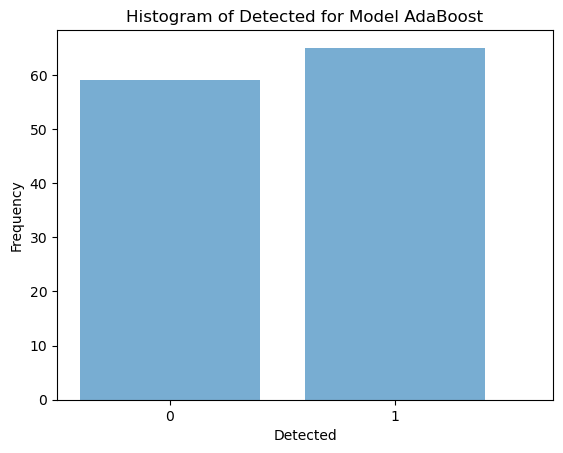

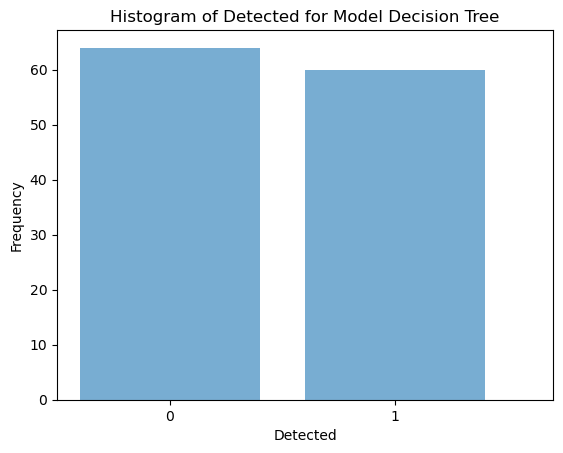

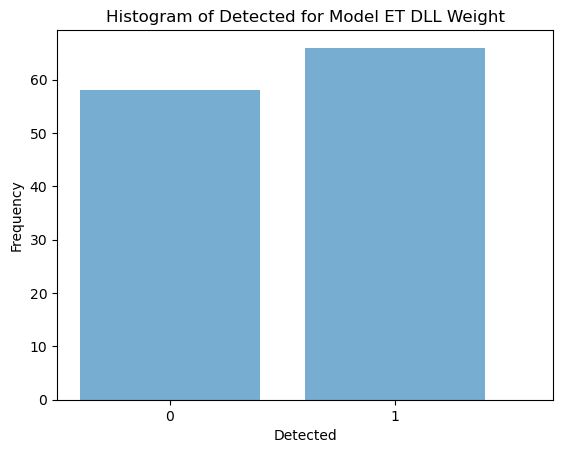

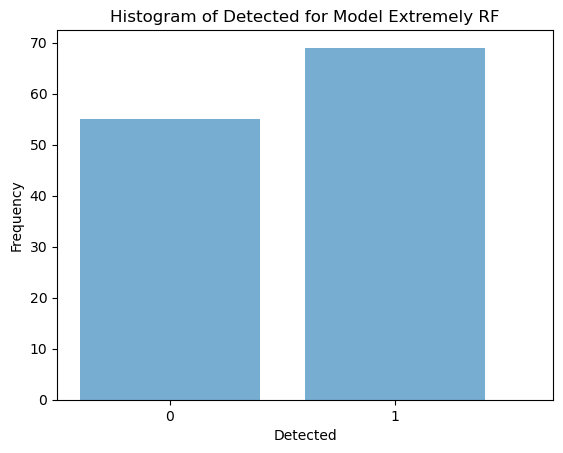

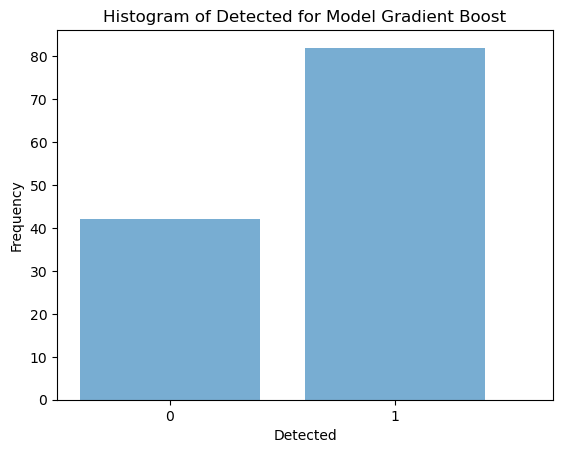

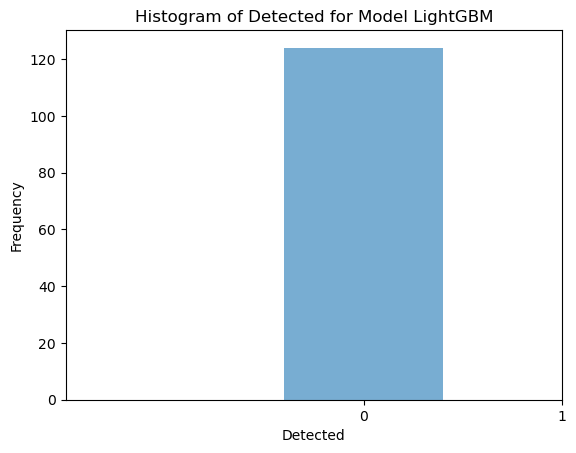

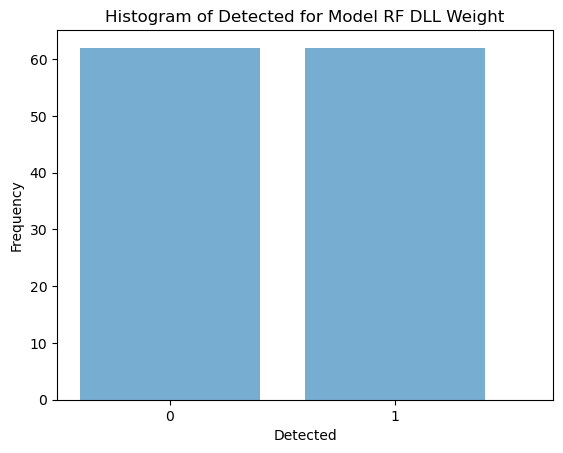

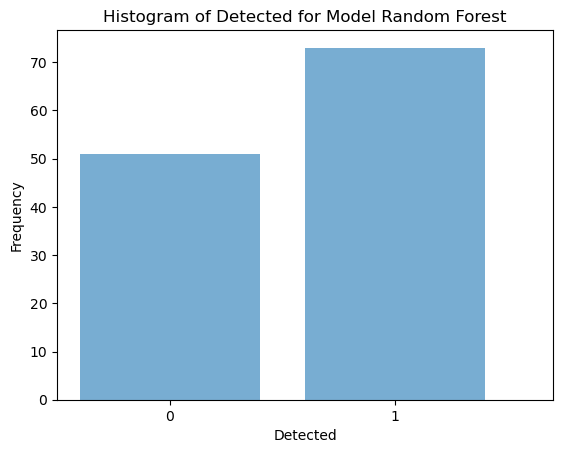

In [12]:
for model, group in report.groupby('Model'):
    plt.figure()
    group['Detected'].plot.hist(bins=2, alpha=0.6, width=0.4)
    plt.xlabel('Detected')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Detected for Model {model}')
    plt.xticks([0.2, 0.7], ['0', '1'])  # Center the ticks between bars
    plt.show()

In [13]:
custom_order = {'AdaBoost': 7, 'Decision Tree': 1, 'ET DLL Weight': 5, 'Extremely RF': 4,
                'Gradient Boost': 6, 'LightGBM': 0, 'RF DLL Weight': 3, 'Random Forest': 2}

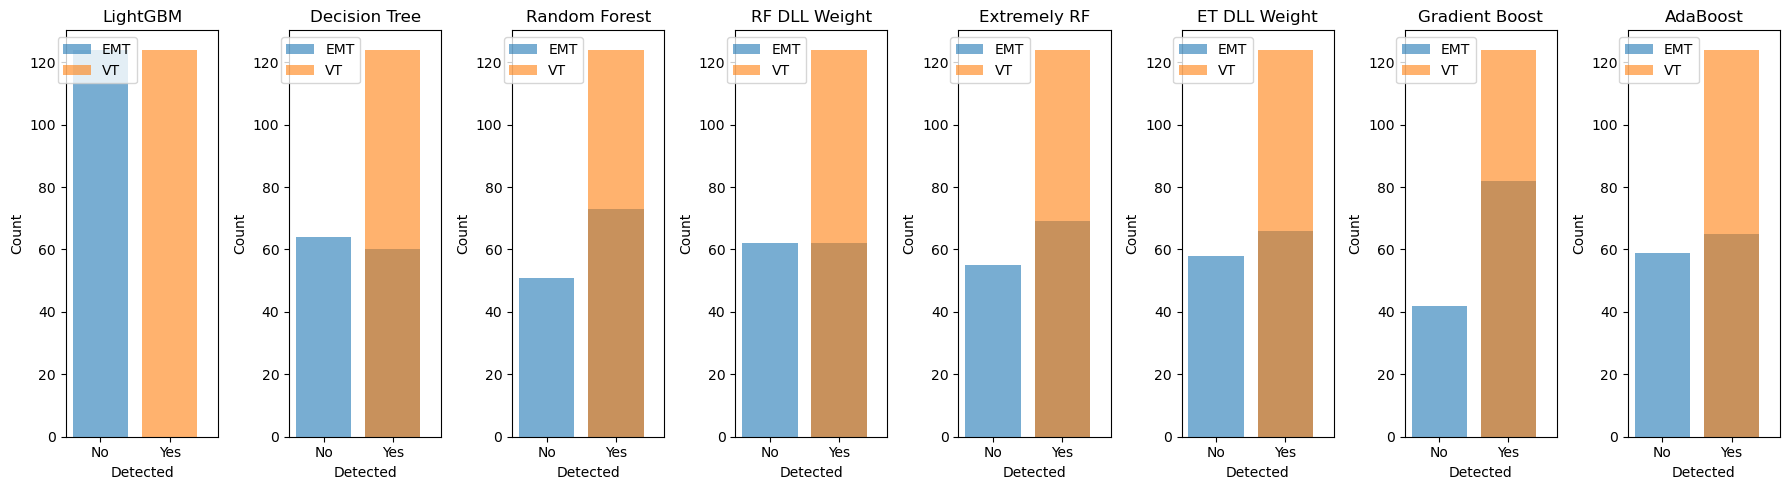

In [14]:
unique_models = report['Model'].unique()
unique_models = sorted(unique_models, key=lambda x: custom_order[x])

# Create a figure with one subplot for each unique model
fig, axs = plt.subplots(1, len(unique_models), figsize=(18, 5))

# Create histograms for 'Detected' and 'VT Detected' for each model
for i, model in enumerate(unique_models):
    model_data = report[report['Model'] == model]
    model_data[['Detected', 'VT Detected']].plot.hist(ax=axs[i], bins=2, alpha=0.6, width=0.4)
    axs[i].set_xlabel('Detected')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'{model}')
    axs[i].legend(['EMT', 'VT'], loc='upper left', bbox_to_anchor=(-0.1, 1))
    axs[i].set_xticks([0.2, 0.7])
    axs[i].set_xticklabels(['No', 'Yes'])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

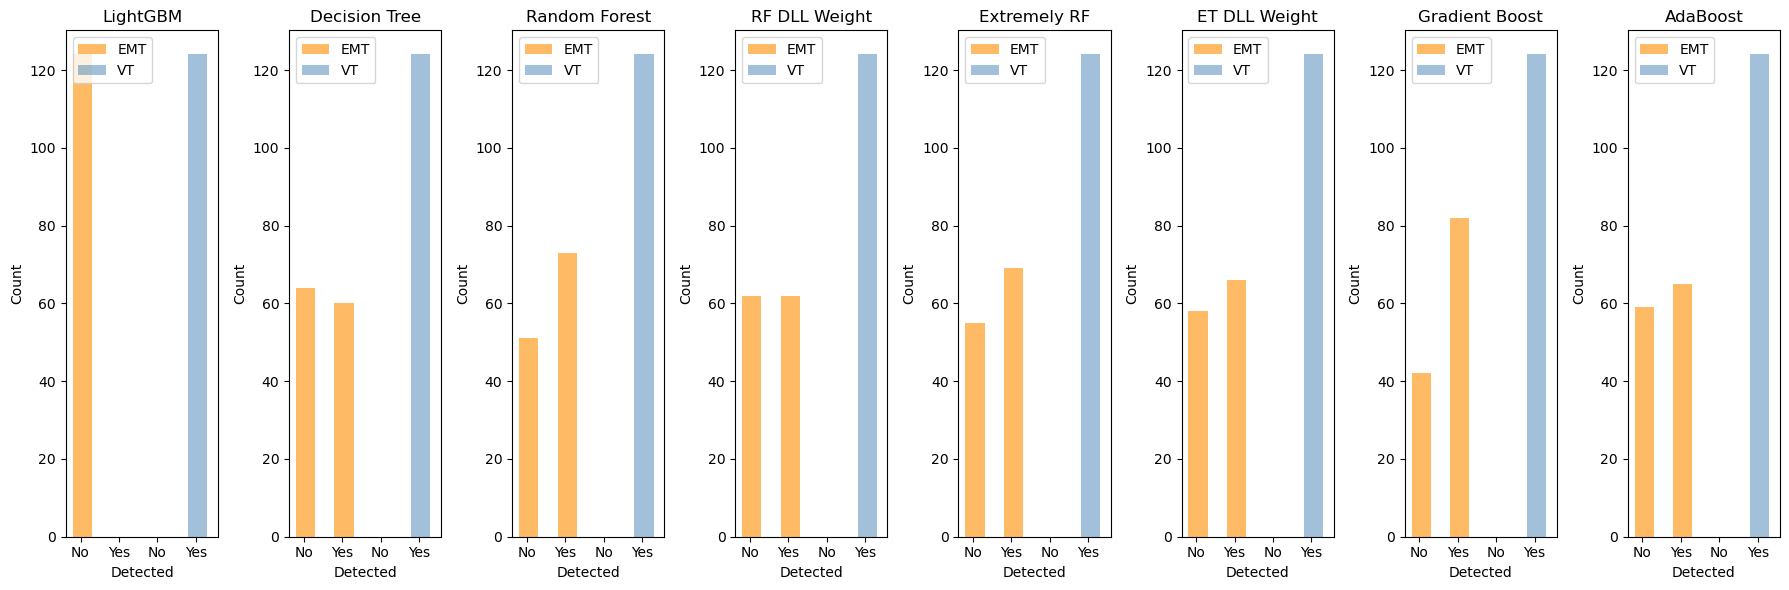

In [15]:
# Get unique models
unique_models = report['Model'].unique()
unique_models = sorted(unique_models, key=lambda x: custom_order[x])

# Create a figure with one subplot for each unique model

fig, axs = plt.subplots(1, len(unique_models), figsize=(18, 6))
tempModel = report[report['Model'] == unique_models[0]]
tempVT = tempModel['VT Detected']
tempVT = tempVT + 2
# Define colors for each histogram
# Create histograms for 'Detected' and 'VT Detected' for each model
for i, model in enumerate(unique_models):
    model_data = report[report['Model'] == model]
    bins = [-0.2, 0.8, 1.8, 2.8, 3.4]
    model_data[['Detected']].plot.hist(ax=axs[i], bins=bins, alpha=0.6, width=0.5, color='darkorange')
    tempVT.plot.hist(ax=axs[i], bins=bins, alpha=0.5, width=0.5, color='steelblue')
    axs[i].set_xlabel('Detected')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'{model}')
    axs[i].legend(['EMT', 'VT'], loc='upper left' )
    axs[i].set_xticks([0, 1, 2, 3])
    axs[i].set_xticklabels(['No', 'Yes', 'No', 'Yes'])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

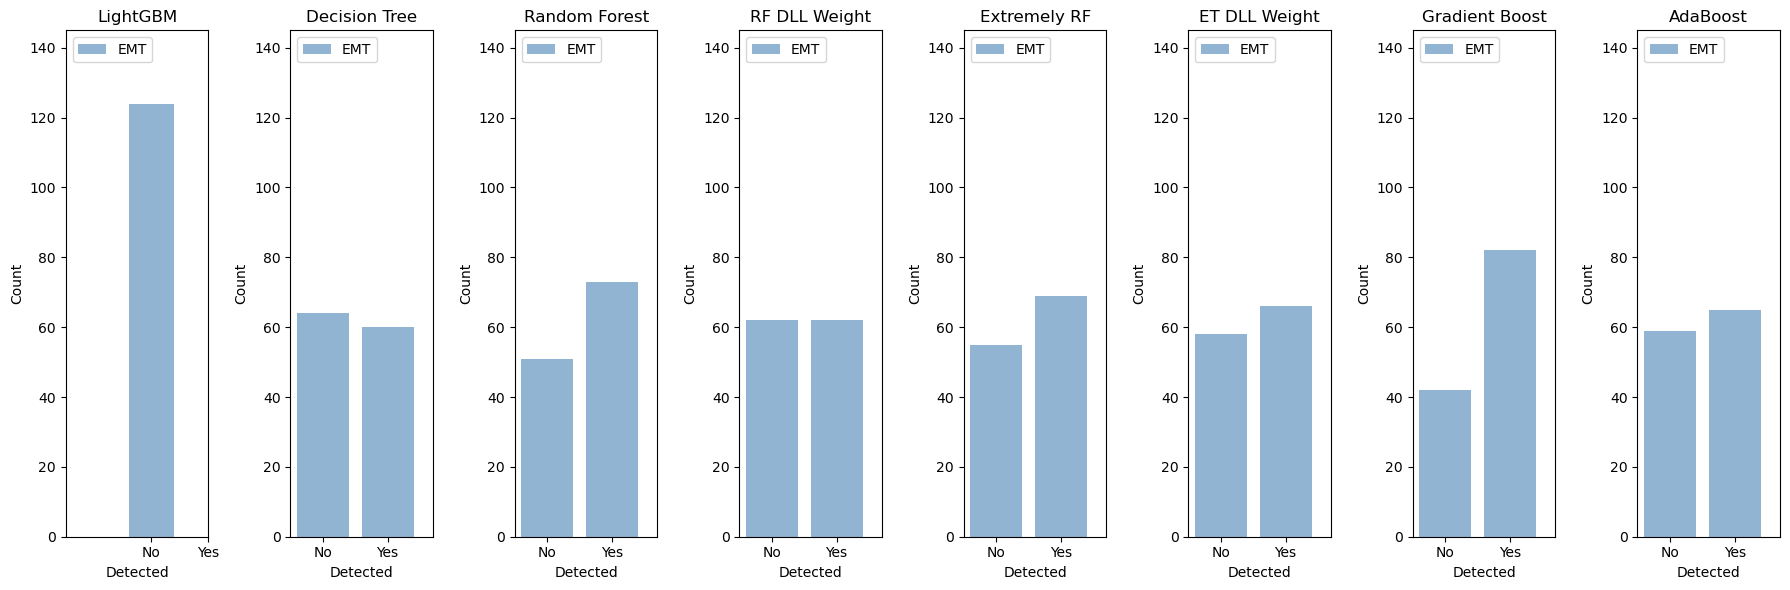

In [80]:

# Get unique models
unique_models = report['Model'].unique()
unique_models = sorted(unique_models, key=lambda x: custom_order[x])

# Create a figure with one subplot for each unique model

fig, axs = plt.subplots(1, len(unique_models), figsize=(18, 6))
tempModel = report[report['Model'] == unique_models[0]]
# Define colors for each histogram
# Create histograms for 'Detected' and 'VT Detected' for each model
for i, model in enumerate(unique_models):
    model_data = report[report['Model'] == model]
    model_data[['Detected']].plot.hist(ax=axs[i], bins=2, alpha=0.6, width=0.4, color='steelblue')
    axs[i].set_xlabel('Detected')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'{model}')
    axs[i].legend(['EMT'], loc='upper left')
    axs[i].set_xticks([0.2, 0.7])
    axs[i].set_xticklabels(['No', 'Yes'])
    axs[i].set_ylim(0, 145)
plt.tight_layout()



## ML Metrics - Malware

In [16]:
columns = ['Model', 'Dataset', 'Testing FPR (%)', 'Accuracy (%)', 'Accuracy Adj (%)', 'FileType', 'Detect Count']
malware_metric_csv = pd.DataFrame(columns=columns)
malware_metric_csv

,Model,Dataset,Testing FPR (%),Accuracy (%),Accuracy Adj (%),FileType,Detect Count


In [18]:
len(model_data['Detected'])

124

In [19]:
unique_models

['LightGBM',
 'Decision Tree',
 'Random Forest',
 'RF DLL Weight',
 'Extremely RF',
 'ET DLL Weight',
 'Gradient Boost',
 'AdaBoost']

In [20]:
# False Positive Rate from EMBER Testing
FPR_Testing = {'LightGBM': 0.0084, 'Decision Tree': 0.0795, 'Random Forest': 0.0409, 'RF DLL Weight': 0.0351, 'Extremely RF': 0.0351, 'ET DLL Weight': 0.0363, 'Gradient Boost': 0.1204, 'AdaBoost': 0.0409}

In [76]:
for model in unique_models:
    print(68 * '-')
    model_data = report[report['Model'] == model]
    print("Data for Model: " + str(model))
    print(68 * '-')
    accuracy = accuracy_score(model_data['VT Detected'], model_data['Detected'])
    print("Accuracy Score:", accuracy)
    dataSize = len(model_data['VT Detected'])
    model_FPR = FPR_Testing[model]
    print('Model Testing FPR: ', model_FPR)
    accuracyAdj = ( accuracy*dataSize + (1-model_FPR)*dataSize) / (dataSize * 2)
    print('Adjusted Accuracy: ', accuracyAdj)
    print(68 * '-')
    print(confusion_matrix(model_data['VT Detected'], model_data['Detected']))
    print(68 * '-')
    detectStr = str(sum(model_data['Detected'])) + '/' + str(len(model_data['VT Detected']))
    print('Detected: ' + detectStr)    
    new_row = dict(zip(columns, [model, 'Malware', model_FPR*100, accuracy*100, accuracyAdj*100, 'All', detectStr]))
    malware_metric_csv = malware_metric_csv._append(new_row, ignore_index = True)



--------------------------------------------------------------------
Data for Model: LightGBM
--------------------------------------------------------------------
Accuracy Score: 0.0
Model Testing FPR:  0.0084
Adjusted Accuracy:  0.4958000000000001
--------------------------------------------------------------------
[[  0   0]
 [124   0]]
--------------------------------------------------------------------
Detected: 0/124
--------------------------------------------------------------------
Data for Model: Decision Tree
--------------------------------------------------------------------
Accuracy Score: 0.4838709677419355
Model Testing FPR:  0.0795
Adjusted Accuracy:  0.7021854838709677
--------------------------------------------------------------------
[[ 0  0]
 [64 60]]
--------------------------------------------------------------------
Detected: 60/124
--------------------------------------------------------------------
Data for Model: Random Forest
--------------------------------

<Figure size 640x480 with 0 Axes>

### Metr

In [22]:
exe_files = report[report['FileType'] == 'exe']
dll_files = report[report['FileType'] == 'dll']

In [23]:
len(exe_files)/8

88.0

In [24]:
len(dll_files)/8

36.0

In [25]:
# EXE Metrics
for model in unique_models:
    print(68 * '-')
    model_data = exe_files[exe_files['Model'] == model]
    print("Data for Model: " + str(model))
    print(68 * '-')
    accuracy = accuracy_score(model_data['VT Detected'], model_data['Detected'])
    print("Accuracy Score:", accuracy)
    dataSize = len(model_data['VT Detected'])
    model_FPR = FPR_Testing[model]
    print('Model Testing FPR: ', model_FPR)
    accuracyAdj = ( accuracy*dataSize + (1-model_FPR)*dataSize) / (dataSize * 2)
    print('Adjusted Accuracy: ', accuracyAdj)
    print(68 * '-')
    print(confusion_matrix(model_data['VT Detected'], model_data['Detected']))
    print(68 * '-')
    detectStr = str(sum(model_data['Detected'])) + '/' + str(len(model_data['VT Detected']))
    print('Detected: ' + detectStr)    
    new_row = dict(zip(columns, [model, 'Malware', model_FPR*100, accuracy*100, accuracyAdj*100, 'EXE', detectStr]))
    malware_metric_csv = malware_metric_csv._append(new_row, ignore_index = True)

--------------------------------------------------------------------
Data for Model: LightGBM
--------------------------------------------------------------------
Accuracy Score: 0.0
Model Testing FPR:  0.0084
Adjusted Accuracy:  0.4958
--------------------------------------------------------------------
[[ 0  0]
 [88  0]]
--------------------------------------------------------------------
Detected: 0/88
--------------------------------------------------------------------
Data for Model: Decision Tree
--------------------------------------------------------------------
Accuracy Score: 0.5
Model Testing FPR:  0.0795
Adjusted Accuracy:  0.71025
--------------------------------------------------------------------
[[ 0  0]
 [44 44]]
--------------------------------------------------------------------
Detected: 44/88
--------------------------------------------------------------------
Data for Model: Random Forest
--------------------------------------------------------------------
Accurac

In [26]:
FPR_Testing_dll = {'LightGBM': 0.0039, 'Decision Tree': 0.0503, 'Random Forest': 0.0206, 'RF DLL Weight': 0.0197, 'Extremely RF': 0.0174, 'ET DLL Weight': 0.0173, 'Gradient Boost': 0.0774, 'AdaBoost': 0.0205}

In [27]:
# DLL Metrics
for model in unique_models:
    print(68 * '-')
    model_data = dll_files[dll_files['Model'] == model]
    print("Data for Model: " + str(model))
    print(68 * '-')
    accuracy = accuracy_score(model_data['VT Detected'], model_data['Detected'])
    print("Accuracy Score:", accuracy)
    dataSize = len(model_data['VT Detected'])
    model_FPR = FPR_Testing_dll[model]
    print('Model Testing FPR: ', model_FPR)
    accuracyAdj = ( accuracy*dataSize + (1-model_FPR)*dataSize) / (dataSize * 2)
    print('Adjusted Accuracy: ', accuracyAdj)
    print(68 * '-')
    print(confusion_matrix(model_data['VT Detected'], model_data['Detected']))
    print(68 * '-')
    detectStr = str(sum(model_data['Detected'])) + '/' + str(len(model_data['VT Detected']))
    print('Detected: ' + detectStr)    
    new_row = dict(zip(columns, [model, 'Malware', model_FPR*100, accuracy*100, accuracyAdj*100, 'DLL', detectStr]))
    malware_metric_csv = malware_metric_csv._append(new_row, ignore_index = True)

--------------------------------------------------------------------
Data for Model: LightGBM
--------------------------------------------------------------------
Accuracy Score: 0.0
Model Testing FPR:  0.0039
Adjusted Accuracy:  0.49805
--------------------------------------------------------------------
[[ 0  0]
 [36  0]]
--------------------------------------------------------------------
Detected: 0/36
--------------------------------------------------------------------
Data for Model: Decision Tree
--------------------------------------------------------------------
Accuracy Score: 0.4444444444444444
Model Testing FPR:  0.0503
Adjusted Accuracy:  0.6970722222222222
--------------------------------------------------------------------
[[ 0  0]
 [20 16]]
--------------------------------------------------------------------
Detected: 16/36
--------------------------------------------------------------------
Data for Model: Random Forest
-------------------------------------------------

In [28]:
malware_metric_csv

,Model,Dataset,Testing FPR (%),Accuracy (%),Accuracy Adj (%),FileType,Detect Count
0,LightGBM,Malware,0.84,0.000000,49.580000,All,0/124
1,Decision Tree,Malware,7.95,48.387097,70.218548,All,60/124
2,Random Forest,Malware,4.09,58.870968,77.390484,All,73/124
3,RF DLL Weight,Malware,3.51,50.000000,73.245000,All,62/124
4,Extremely RF,Malware,3.51,55.645161,76.067581,All,69/124
5,ET DLL Weight,Malware,3.63,53.225806,74.797903,All,66/124
6,Gradient Boost,Malware,12.04,66.129032,77.044516,All,82/124
7,AdaBoost,Malware,4.09,52.419355,74.164677,All,65/124
8,LightGBM,Malware,0.84,0.000000,49.580000,EXE,0/88
9,Decision Tree,Malware,7.95,50.000000,71.025000,EXE,44/88


In [ ]:
malware_metric_csv.to_csv('EMT_Malware_Post_Processing.csv', index=True)

In [31]:
csv_name2 = 'meterpreter.csv'
csv_path2 = 'K:\\development\\VMshare\\' + csv_name2
csv_path2

'K:\\development\\VMshare\\meterpreter.csv'

In [48]:
report2 = pd.read_csv(csv_path2)
report2 = report2.drop(columns=report2.columns[0])
report2

,Model,SHA256 Hash,File Name,Detected,FileType
0,GBC1.joblib,8b7eaa551a15174caed8d44cb9bf9e3773350d039125cd238c21439e83437d8e,meterpreter_bind_named_pipe_32_exe,1,exe
1,GBC1.joblib,7137de0974395e5d135ff2f039e084dc73c778650ccb351ea7fa6fab7a06273a,meterpreter_bind_tcp_32_exe,1,exe
2,GBC1.joblib,59e39e8802cd1a4baf6f03df6795a6e7230c6cc7a951e55d1dd3aada6ddf8e61,meterpreter_bind_named_pipe_64_exe,1,exe
3,GBC1.joblib,add2a70519e48e6bbc291115a6addc0cc63bd6dd2bf89ec6b2a80d4e45e9ba84,meterpreter_reverse_tcp_32_exe,1,exe
4,GBC1.joblib,cab228f8110e3448450b595cfb06c473f928736da7b64c10526735226448e542,meterpreter_reverse_https_32_exe,1,exe
...,...,...,...,...,...
331,lgbm.joblib,8ca3200adc07a2dec64e1712ce9fbafa859bfa0b9162ab1d8d7ca808a60bacc0,stager_reverse_tcp_64_exe,0,exe
332,lgbm.joblib,a3e86507a663693cfccc00144cd288090b97ed06f229a4c51acb3381478a7ce8,stager_bind_tcp_32_dll,0,exe
333,lgbm.joblib,6504abc83fe99baf7054a98e3fd80a56e5e681fbc193018c3aaf87cba33a94c8,stager_bind_tcp_64_dll,0,exe
334,lgbm.joblib,35bb78a64f21cf78dc56a7277f321162945031727b96924e7cc9556506bca129,stager_reverse_tcp_32_dll,0,exe


In [49]:
report2['Model'] = report2['Model'].replace('GBC1.joblib', 'Gradient Boost')
report2['Model'] = report2['Model'].replace('TR1.joblib', 'Decision Tree')
report2['Model'] = report2['Model'].replace('RF9_DLLW.joblib', 'RF DLL Weight')
report2['Model'] = report2['Model'].replace('ET1.joblib', 'Extremely RF')
report2['Model'] = report2['Model'].replace('RF9.joblib', 'Random Forest')
report2['Model'] = report2['Model'].replace('ET1_DLL.joblib', 'ET DLL Weight')
report2['Model'] = report2['Model'].replace('ADB_RF9.joblib', 'AdaBoost')
report2['Model'] = report2['Model'].replace('lgbm.joblib', 'LightGBM')

In [50]:
report2

,Model,SHA256 Hash,File Name,Detected,FileType
0,Gradient Boost,8b7eaa551a15174caed8d44cb9bf9e3773350d039125cd238c21439e83437d8e,meterpreter_bind_named_pipe_32_exe,1,exe
1,Gradient Boost,7137de0974395e5d135ff2f039e084dc73c778650ccb351ea7fa6fab7a06273a,meterpreter_bind_tcp_32_exe,1,exe
2,Gradient Boost,59e39e8802cd1a4baf6f03df6795a6e7230c6cc7a951e55d1dd3aada6ddf8e61,meterpreter_bind_named_pipe_64_exe,1,exe
3,Gradient Boost,add2a70519e48e6bbc291115a6addc0cc63bd6dd2bf89ec6b2a80d4e45e9ba84,meterpreter_reverse_tcp_32_exe,1,exe
4,Gradient Boost,cab228f8110e3448450b595cfb06c473f928736da7b64c10526735226448e542,meterpreter_reverse_https_32_exe,1,exe
...,...,...,...,...,...
331,LightGBM,8ca3200adc07a2dec64e1712ce9fbafa859bfa0b9162ab1d8d7ca808a60bacc0,stager_reverse_tcp_64_exe,0,exe
332,LightGBM,a3e86507a663693cfccc00144cd288090b97ed06f229a4c51acb3381478a7ce8,stager_bind_tcp_32_dll,0,exe
333,LightGBM,6504abc83fe99baf7054a98e3fd80a56e5e681fbc193018c3aaf87cba33a94c8,stager_bind_tcp_64_dll,0,exe
334,LightGBM,35bb78a64f21cf78dc56a7277f321162945031727b96924e7cc9556506bca129,stager_reverse_tcp_32_dll,0,exe


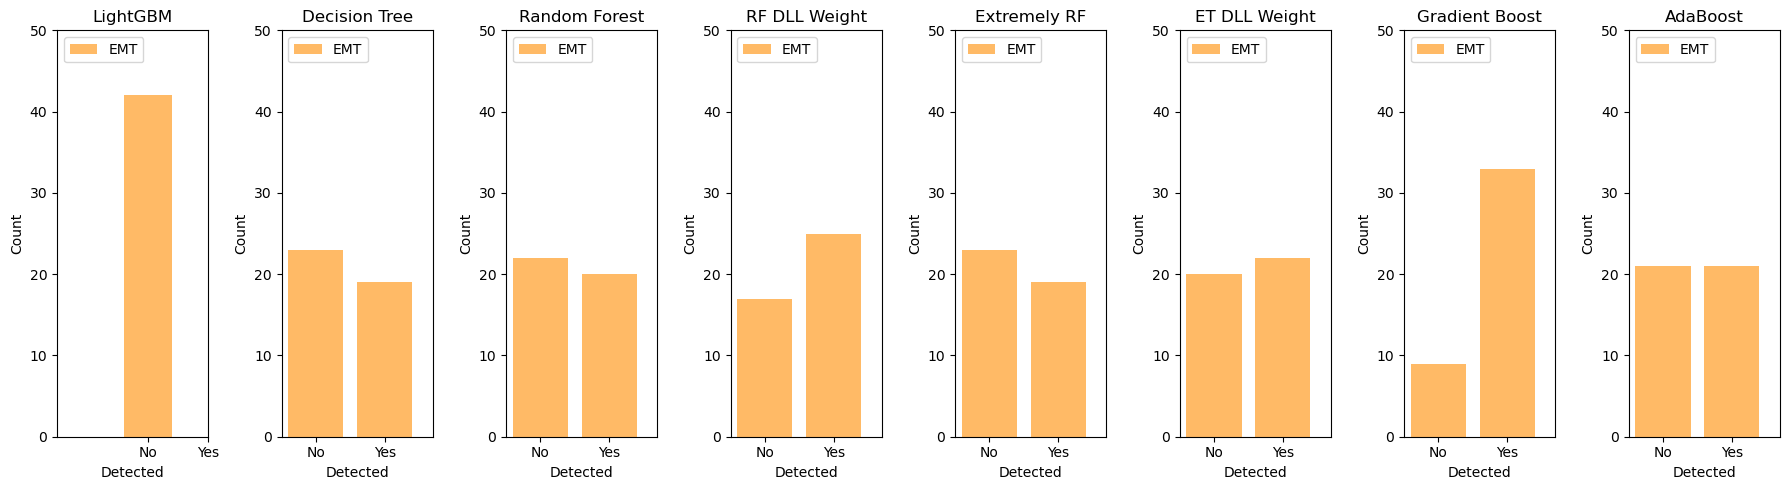

In [55]:
unique_models = report2['Model'].unique()
unique_models = sorted(unique_models, key=lambda x: custom_order[x])

# Create a figure with one subplot for each unique model
fig, axs = plt.subplots(1, len(unique_models), figsize=(18, 5))

# Create histograms for 'Detected' and 'VT Detected' for each model
for i, model in enumerate(unique_models):
    model_data = report2[report2['Model'] == model]
    model_data[['Detected']].plot.hist(ax=axs[i], bins=2, alpha=0.6, width=0.4, color='darkorange')
    axs[i].set_xlabel('Detected')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'{model}')
    axs[i].legend(['EMT'], loc='upper left')
    axs[i].set_xticks([0.2, 0.7])
    axs[i].set_xticklabels(['No', 'Yes'])
    axs[i].set_ylim(0, 50)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
model_data = report2[report2['Model'] == 'Gradient Boost']
model_data
len(model_data)

42

In [70]:
columns = ['Model', 'Dataset', 'Testing FPR (%)', 'Accuracy (%)', 'Accuracy Adj (%)', 'FileType', 'Detect Count']
malware_metric_csv2 = pd.DataFrame(columns=columns)
malware_metric_csv2

,Model,Dataset,Testing FPR (%),Accuracy (%),Accuracy Adj (%),FileType,Detect Count


In [71]:
for model in unique_models:
    print(68 * '-')
    model_data = report2[report2['Model'] == model]
    print("Data for Model: " + str(model))
    print(68 * '-')
    accuracy = accuracy_score(np.ones(42), model_data['Detected'])
    print("Accuracy Score:", accuracy)
    dataSize = len(model_data['Detected'])
    model_FPR = FPR_Testing[model]
    print('Model Testing FPR: ', model_FPR)
    accuracyAdj = ( accuracy*dataSize + (1-model_FPR)*dataSize) / (dataSize * 2)
    print('Adjusted Accuracy: ', accuracyAdj)
    print(68 * '-')
    print(confusion_matrix(np.ones(42), model_data['Detected']))
    print(68 * '-')
    detectStr = str(sum(model_data['Detected'])) + '/' + str(len(model_data['Detected']))
    print('Detected: ' + detectStr)    
    new_row = dict(zip(columns, [model, 'Meterpreter', model_FPR*100, accuracy*100, accuracyAdj*100, 'All', detectStr]))
    malware_metric_csv2 = malware_metric_csv2._append(new_row, ignore_index = True)


--------------------------------------------------------------------
Data for Model: LightGBM
--------------------------------------------------------------------
Accuracy Score: 0.0
Model Testing FPR:  0.0084
Adjusted Accuracy:  0.49579999999999996
--------------------------------------------------------------------
[[ 0  0]
 [42  0]]
--------------------------------------------------------------------
Detected: 0/42
--------------------------------------------------------------------
Data for Model: Decision Tree
--------------------------------------------------------------------
Accuracy Score: 0.4523809523809524
Model Testing FPR:  0.0795
Adjusted Accuracy:  0.6864404761904762
--------------------------------------------------------------------
[[ 0  0]
 [23 19]]
--------------------------------------------------------------------
Detected: 19/42
--------------------------------------------------------------------
Data for Model: Random Forest
-------------------------------------

C:\Users\joelm\AppData\Local\Temp\ipykernel_82460\1768741681.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  malware_metric_csv2 = malware_metric_csv2._append(new_row, ignore_index = True)
